Yash Rawal




*   Email: yashrawal987@gmail.com
*   Contact No.: (+91) 9399159685
*   Github: https://github.com/YashRL
*   LinkedIn: https://www.linkedin.com/in/yash-rawal-42334921a/








In [1]:
import pandas as pd
import os
import nltk
from nltk.tokenize import word_tokenize
from openpyxl import load_workbook
from nltk.corpus import stopwords
import string
from textblob import TextBlob
from collections import Counter
nltk.download('punkt')
nltk.download('cmudict')
nltk.download('stopwords')
import re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#@title To extract the content.zip which contains Input.xlsx, Master Directory, Stop Words Directory
import zipfile
import os

# Replace 'YOUR_ZIP_FILE_PATH' with the path to your zip file
zip_file_path = '/content/content.zip'

# Replace 'EXTRACTION_PATH' with the path where you want to extract the contents
extraction_path = '/'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)


In [3]:
# Read the Excel file
input_data = pd.read_excel('/content/Input.xlsx')

# Extract URLs
urls = input_data['URL']  # Assuming the column name is 'URL', adjust as needed

# Now you have a list of URLs from input.xlsx
print(urls)

from bs4 import BeautifulSoup
import requests


def extract_article_text(url):
    # Make a GET request to the URL
    response = requests.get(url)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract article text (change according to HTML structure)
    article_text = ""
    # Example: find all <p> tags and concatenate text
    for paragraph in soup.find_all('p'):
        article_text += paragraph.get_text() + "\n"

    return article_text


# Loop through the URLs and extract article text
for url in urls:
    article_text = extract_article_text(url)
    # Save 'article_text' to a file using URL_ID as the file name (as per instructions)
    # You'll need to implement the file-saving logic here.

# ... (previous code remains the same)

# Function to save article text to files
import os


def save_to_file(url_id, text):
    file_name = f"{url_id}.txt"
    file_path = os.path.join(os.getcwd(), file_name)

    with open(file_path, "w", encoding="utf-8") as file:
        file.write(text)

    if os.path.exists(file_path):
        print(f"File '{file_name}' successfully created.")
    else:
        print(f"File '{file_name}' was not created.")


# Loop through the URLs and extract article text
for index, url in urls.iteritems():
    article_text = extract_article_text(url)
    url_id = input_data.loc[index, 'URL_ID']
    save_to_file(url_id, article_text)


0     https://insights.blackcoffer.com/rising-it-cit...
1     https://insights.blackcoffer.com/rising-it-cit...
2     https://insights.blackcoffer.com/internet-dema...
3     https://insights.blackcoffer.com/rise-of-cyber...
4     https://insights.blackcoffer.com/ott-platform-...
                            ...                        
95    https://insights.blackcoffer.com/what-is-the-r...
96    https://insights.blackcoffer.com/impact-of-cov...
97    https://insights.blackcoffer.com/contribution-...
98    https://insights.blackcoffer.com/how-covid-19-...
99    https://insights.blackcoffer.com/how-will-covi...
Name: URL, Length: 100, dtype: object


<ipython-input-3-345c25fe61d5>:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, url in urls.iteritems():


File 'blackassign0001.txt' successfully created.
File 'blackassign0002.txt' successfully created.
File 'blackassign0003.txt' successfully created.
File 'blackassign0004.txt' successfully created.
File 'blackassign0005.txt' successfully created.
File 'blackassign0006.txt' successfully created.
File 'blackassign0007.txt' successfully created.
File 'blackassign0008.txt' successfully created.
File 'blackassign0009.txt' successfully created.
File 'blackassign0010.txt' successfully created.
File 'blackassign0011.txt' successfully created.
File 'blackassign0012.txt' successfully created.
File 'blackassign0013.txt' successfully created.
File 'blackassign0014.txt' successfully created.
File 'blackassign0015.txt' successfully created.
File 'blackassign0016.txt' successfully created.
File 'blackassign0017.txt' successfully created.
File 'blackassign0018.txt' successfully created.
File 'blackassign0019.txt' successfully created.
File 'blackassign0020.txt' successfully created.
File 'blackassign002

In [4]:
#@title generating the Output Data Structure.xlsx file for storing and arranging the data
import pandas as pd

# Creating a list of file names
file_names_list = []
for i in range(1, 101):
    file_number = f"blackassign{str(i).zfill(4)}"
    file_names_list.append(file_number)

# Creating a list of URLs in sequence
urls_list = []  # Replace this with your actual list of URLs
# Example of adding URLs in sequence
for i in range(1, 101):
    url = f"https://www.example.com/page/{i}"  # Replace this with actual URLs
    urls_list.append(url)

# Creating the DataFrame with labels
labels = [
    "URL_ID", "URL", "POSITIVE SCORE", "NEGATIVE SCORE", "POLARITY SCORE",
    "SUBJECTIVITY SCORE", "AVG SENTENCE LENGTH", "PERCENTAGE OF COMPLEX WORDS",
    "FOG INDEX", "AVG NUMBER OF WORDS PER SENTENCE", "COMPLEX WORD COUNT",
    "WORD COUNT", "SYLLABLE PER WORD", "PERSONAL PRONOUNS", "AVG WORD LENGTH"
]
df = pd.DataFrame(columns=labels)

# Writing file names to the DataFrame
df["URL_ID"] = file_names_list

# Writing URLs to the DataFrame
df["URL"] = urls_list

# Saving the DataFrame to 'Output Data Structure.xlsx'
df.to_excel("Output Data Structure.xlsx", index=False)


In [5]:
#@title showing the output file
outputdf = pd.read_excel('/content/Output Data Structure.xlsx')
outputdf

,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,blackassign0001,https://www.example.com/page/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,blackassign0002,https://www.example.com/page/2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,blackassign0003,https://www.example.com/page/3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,blackassign0004,https://www.example.com/page/4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,blackassign0005,https://www.example.com/page/5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blackassign0096,https://www.example.com/page/96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,blackassign0097,https://www.example.com/page/97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,blackassign0098,https://www.example.com/page/98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,blackassign0099,https://www.example.com/page/99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Get all files in the directory
file_names = [file for file in os.listdir('/content') if os.path.isfile(os.path.join('/content', file))]

data = []

# Read text from each file
for file_name in file_names:
    with open(os.path.join('/content', file_name), 'r', encoding='latin-1') as file:  # Specify the encoding
        content = file.read()
        data.append({'Filename': file_name, 'Content': content})

# Create a DataFrame
df = pd.DataFrame(data)


In [7]:
print(df.head())

              Filename                                            Content
0  blackassign0066.txt  Automate the Data Management Process\nRealtime...
1  blackassign0059.txt  Automate the Data Management Process\nRealtime...
2  blackassign0092.txt  Automate the Data Management Process\nRealtime...
3  blackassign0001.txt  Automate the Data Management Process\nRealtime...
4  blackassign0012.txt  Automate the Data Management Process\nRealtime...


In [8]:
# Function for text preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())  # Lowercasing and tokenization
    # Removing stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    return tokens

# Apply preprocessing to 'Content' column in the DataFrame
df['Processed_Content'] = df['Content'].apply(preprocess_text)


**1. Sentiment Analysis:**

In [9]:
# Example sentiment analysis on a single sentence
text = "This is a fantastic tool!"
blob = TextBlob(text)
sentiment = blob.sentiment
print(sentiment)  # Returns a polarity and subjectivity score (-1 to 1)


Sentiment(polarity=0.5, subjectivity=0.9)


**1.1 Cleaning using Stop Words Lists**

In [10]:
# Path to the folder containing text files
folder_path = '/content/'

for i in range(1, 101):  # Loop through files from 0001 to 0100
    file_name = f"blackassign{str(i).zfill(4)}.txt"  # Generate file name
    file_path = os.path.join(folder_path, file_name)  # Full path to each file

    # Read the text file
    with open(file_path, 'r', encoding='latin-1') as file:
        text = file.read()

    # Redefine stopwords set for each iteration
    stopwords_files = [
        "/content/stop_words/StopWords_Names.txt",
        "/content/stop_words/StopWords_Geographic.txt",
        "/content/stop_words/StopWords_GenericLong.txt",
        "/content/stop_words/StopWords_Generic.txt",
        "/content/stop_words/StopWords_DatesandNumbers.txt",
        "/content/stop_words/StopWords_Currencies.txt",
        "/content/stop_words/StopWords_Auditor.txt"
    ]
    stopwords = set()

    # Collect stopwords from different files
    for stopword_file in stopwords_files:
        with open(stopword_file, 'r', encoding='latin-1') as f:
            words = f.read().splitlines()
            stopwords.update(words)

    # Clean the text by removing stopwords
    words = text.split()
    cleaned_text = ' '.join([word for word in words if word.lower() not in stopwords])

    # Perform sentiment analysis on the cleaned text
    blob = TextBlob(cleaned_text)
    sentiment = blob.sentiment

    # Output sentiment analysis for each file
    print(f"{file_name} {sentiment}")



blackassign0001.txt Sentiment(polarity=0.17169738863287254, subjectivity=0.5347926267281106)
blackassign0002.txt Sentiment(polarity=0.08209268004722552, subjectivity=0.43085005903187723)
blackassign0003.txt Sentiment(polarity=0.06903310104529618, subjectivity=0.3906794425087108)
blackassign0004.txt Sentiment(polarity=0.012547467152730314, subjectivity=0.37902046783625726)
blackassign0005.txt Sentiment(polarity=0.09682239057239059, subjectivity=0.4822811447811449)
blackassign0006.txt Sentiment(polarity=0.10917990342990344, subjectivity=0.5738882783882782)
blackassign0007.txt Sentiment(polarity=0.04705882352941177, subjectivity=0.4301295518207282)
blackassign0008.txt Sentiment(polarity=0.10395545314900152, subjectivity=0.43245007680491554)
blackassign0009.txt Sentiment(polarity=0.05491822991822991, subjectivity=0.39760702260702263)
blackassign0010.txt Sentiment(polarity=0.12155797101449277, subjectivity=0.4928260869565217)
blackassign0011.txt Sentiment(polarity=0.0774335188620903, subjec

In [11]:
# Path to the folder containing text files
folder_path = '/content/'

sentiments_list = []  # Create an empty list to store sentiment outputs

for i in range(1, 101):  # Loop through files from 0001 to 0100
    file_name = f"blackassign{str(i).zfill(4)}.txt"  # Generate file name
    file_path = os.path.join(folder_path, file_name)  # Full path to each file

    # Read the text file
    with open(file_path, 'r', encoding='latin-1') as file:
        text = file.read()

    # Redefine stopwords set for each iteration
    stopwords_files = [
        "/content/stop_words/StopWords_Names.txt",
        "/content/stop_words/StopWords_Geographic.txt",
        "/content/stop_words/StopWords_GenericLong.txt",
        "/content/stop_words/StopWords_Generic.txt",
        "/content/stop_words/StopWords_DatesandNumbers.txt",
        "/content/stop_words/StopWords_Currencies.txt",
        "/content/stop_words/StopWords_Auditor.txt"
    ]
    stopwords = set()

    # Collect stopwords from different files
    for stopword_file in stopwords_files:
        with open(stopword_file, 'r', encoding='latin-1') as f:
            words = f.read().splitlines()
            stopwords.update(words)

    # Clean the text by removing stopwords
    words = text.split()
    cleaned_text = ' '.join([word for word in words if word.lower() not in stopwords])

    # Perform sentiment analysis on the cleaned text
    blob = TextBlob(cleaned_text)
    sentiment = blob.sentiment

    # Append sentiment analysis to the list
    sentiments_list.append(sentiment)

    # Output sentiment analysis for each file
    print(f"{file_name} {sentiment}")

# Display the list of sentiment outputs for each file
print("Sentiments List:", sentiments_list)


blackassign0001.txt Sentiment(polarity=0.17169738863287254, subjectivity=0.5347926267281106)
blackassign0002.txt Sentiment(polarity=0.08209268004722552, subjectivity=0.43085005903187723)
blackassign0003.txt Sentiment(polarity=0.06903310104529618, subjectivity=0.3906794425087108)
blackassign0004.txt Sentiment(polarity=0.012547467152730314, subjectivity=0.37902046783625726)
blackassign0005.txt Sentiment(polarity=0.09682239057239059, subjectivity=0.4822811447811449)
blackassign0006.txt Sentiment(polarity=0.10917990342990344, subjectivity=0.5738882783882782)
blackassign0007.txt Sentiment(polarity=0.04705882352941177, subjectivity=0.4301295518207282)
blackassign0008.txt Sentiment(polarity=0.10395545314900152, subjectivity=0.43245007680491554)
blackassign0009.txt Sentiment(polarity=0.05491822991822991, subjectivity=0.39760702260702263)
blackassign0010.txt Sentiment(polarity=0.12155797101449277, subjectivity=0.4928260869565217)
blackassign0011.txt Sentiment(polarity=0.0774335188620903, subjec

**1.2 Creating a dictionary of Positive and Negative words**

In [12]:
# Paths for text files and stopwords
text_files_directory = "/content/"  # Directory containing text files
stopwords_files = [
    "/content/stop_words/StopWords_Names.txt",
    "/content/stop_words/StopWords_Geographic.txt",
    "/content/stop_words/StopWords_GenericLong.txt",
    "/content/stop_words/StopWords_Generic.txt",
    "/content/stop_words/StopWords_DatesandNumbers.txt",
    "/content/stop_words/StopWords_Currencies.txt",
    "/content/stop_words/StopWords_Auditor.txt"
]

# Collect stopwords from different files
stopwords = set()
for file in stopwords_files:
    with open(file, 'r', encoding='latin-1') as f:
        words = f.read().splitlines()
        stopwords.update(words)

# Positive and Negative words
positive_words_file = "/content/master_dictionary/negative-words.txt"
negative_words_file = "/content/master_dictionary/positive-words.txt"

positive_words = set()
negative_words = set()

# Collect positive words
with open(positive_words_file, 'r', encoding='latin-1') as f:
    words = f.read().splitlines()
    positive_words.update(words)

# Collect negative words
with open(negative_words_file, 'r', encoding='latin-1') as f:
    words = f.read().splitlines()
    negative_words.update(words)

# Initialize lists to store counts and values
positive_count_list = []
negative_count_list = []
positive_values_list = []
negative_values_list = []

# Process each text file
for filename in os.listdir(text_files_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(text_files_directory, filename)
        with open(file_path, 'r', encoding='latin-1') as file:
            text = file.read()

        # Clean the text by removing stopwords
        words = text.split()
        cleaned_text = ' '.join([word for word in words if word.lower() not in stopwords])

        # Perform sentiment analysis on the cleaned text
        blob = TextBlob(cleaned_text)
        sentiment = blob.sentiment

        # Count occurrences of positive and negative words
        positive_count = Counter([word for word in words if word.lower() in positive_words])
        negative_count = Counter([word for word in words if word.lower() in negative_words])

        # Append counts and values to respective lists
        positive_count_list.append(len(positive_count))
        negative_count_list.append(len(negative_count))
        positive_values_list.append(sum(positive_count.values()))
        negative_values_list.append(sum(negative_count.values()))

        # Display results for each file
        print(f"File: {filename}")
        print("Sentiment Analysis:", sentiment)
        print("Positive Words Count:", len(positive_count))
        print("Negative Words Count:", len(negative_count))
        print("Total Positive Words:", sum(positive_count.values()))
        print("Total Negative Words:", sum(negative_count.values()))
        print("----------------------------------------")

# Display the lists
print("Positive Count List:", positive_count_list)
print("Negative Count List:", negative_count_list)
print("Positive Values List:", positive_values_list)
print("Negative Values List:", negative_values_list)


File: blackassign0066.txt
Sentiment Analysis: Sentiment(polarity=-0.01162217412217411, subjectivity=0.3585197210197211)
Positive Words Count: 22
Negative Words Count: 35
Total Positive Words: 23
Total Negative Words: 43
----------------------------------------
File: blackassign0059.txt
Sentiment Analysis: Sentiment(polarity=0.058182302771855016, subjectivity=0.4496268656716417)
Positive Words Count: 20
Negative Words Count: 24
Total Positive Words: 27
Total Negative Words: 26
----------------------------------------
File: blackassign0092.txt
Sentiment Analysis: Sentiment(polarity=0.05927372685185185, subjectivity=0.3152469135802469)
Positive Words Count: 33
Negative Words Count: 24
Total Positive Words: 38
Total Negative Words: 27
----------------------------------------
File: blackassign0001.txt
Sentiment Analysis: Sentiment(polarity=0.17169738863287254, subjectivity=0.5347926267281106)
Positive Words Count: 3
Negative Words Count: 11
Total Positive Words: 4
Total Negative Words: 13
-

**1.3 Extracting Derived variables**

In [13]:
# Paths for text files and stopwords
text_files_directory = "/content/"  # Directory containing text files
stopwords_files = [
    "/content/stop_words/StopWords_Names.txt",
    "/content/stop_words/StopWords_Geographic.txt",
    "/content/stop_words/StopWords_GenericLong.txt",
    "/content/stop_words/StopWords_Generic.txt",
    "/content/stop_words/StopWords_DatesandNumbers.txt",
    "/content/stop_words/StopWords_Currencies.txt",
    "/content/stop_words/StopWords_Auditor.txt"
]

# Collect stopwords from different files
stopwords = set()
for file in stopwords_files:
    with open(file, 'r', encoding='latin-1') as f:
        words = f.read().splitlines()
        stopwords.update(words)

# Positive and Negative words
positive_words_file = "/content/master_dictionary/negative-words.txt"
negative_words_file = "/content/master_dictionary/positive-words.txt"

positive_words = set()
negative_words = set()

# Collect positive words
with open(positive_words_file, 'r', encoding='latin-1') as f:
    words = f.read().splitlines()
    positive_words.update(words)

# Collect negative words
with open(negative_words_file, 'r', encoding='latin-1') as f:
    words = f.read().splitlines()
    negative_words.update(words)

# Initialize lists to store values
sentiment_list = []
positive_score_list = []
negative_score_list = []
polarity_score_list = []
subjectivity_score_list = []

# Process each text file
for filename in os.listdir(text_files_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(text_files_directory, filename)
        with open(file_path, 'r', encoding='latin-1') as file:
            text = file.read()

        # Clean the text by removing stopwords
        words = text.split()
        cleaned_text = ' '.join([word for word in words if word.lower() not in stopwords])

        # Perform sentiment analysis on the cleaned text
        blob = TextBlob(cleaned_text)
        sentiment = blob.sentiment

        # Calculate Positive and Negative Scores
        positive_score = sum(1 for word in cleaned_text.split() if word.lower() in positive_words)
        negative_score = -sum(1 for word in cleaned_text.split() if word.lower() in negative_words)

        # Calculate Polarity Score and Subjectivity Score
        total_words = len(cleaned_text.split())
        polarity_score = (positive_score - negative_score) / ((positive_score + negative_score) + 0.000001)
        subjectivity_score = (positive_score + negative_score) / (total_words + 0.000001)

        # Append values to respective lists
        sentiment_list.append(sentiment)
        positive_score_list.append(positive_score)
        negative_score_list.append(negative_score)
        polarity_score_list.append(polarity_score)
        subjectivity_score_list.append(subjectivity_score)

        # Display results for each file
        print(f"File: {filename}")
        print("Sentiment Analysis:", sentiment)
        print("Positive Score:", positive_score)
        print("Negative Score:", negative_score)
        print("Polarity Score:", polarity_score)
        print("Subjectivity Score:", subjectivity_score)
        print("----------------------------------------")

# Display the lists
print("Sentiment List:", sentiment_list)
print("Positive Score List:", positive_score_list)
print("Negative Score List:", negative_score_list)
print("Polarity Score List:", polarity_score_list)
print("Subjectivity Score List:", subjectivity_score_list)


File: blackassign0066.txt
Sentiment Analysis: Sentiment(polarity=-0.01162217412217411, subjectivity=0.3585197210197211)
Positive Score: 23
Negative Score: -30
Polarity Score: -7.571429653061379
Subjectivity Score: -0.008130081291370404
----------------------------------------
File: blackassign0059.txt
Sentiment Analysis: Sentiment(polarity=0.058182302771855016, subjectivity=0.4496268656716417)
Positive Score: 27
Negative Score: -21
Polarity Score: 7.9999986666668885
Subjectivity Score: 0.011811023598797198
----------------------------------------
File: blackassign0092.txt
Sentiment Analysis: Sentiment(polarity=0.05927372685185185, subjectivity=0.3152469135802469)
Positive Score: 38
Negative Score: -22
Polarity Score: 3.7499997656250144
Subjectivity Score: 0.019024970250862104
----------------------------------------
File: blackassign0001.txt
Sentiment Analysis: Sentiment(polarity=0.17169738863287254, subjectivity=0.5347926267281106)
Positive Score: 4
Negative Score: -10
Polarity Score:

**Readability Analysis:**

In [14]:
text_files_directory = "/content/"
stopwords_files = [
    "/content/stop_words/StopWords_Names.txt",
    "/content/stop_words/StopWords_Geographic.txt",
    "/content/stop_words/StopWords_GenericLong.txt",
    "/content/stop_words/StopWords_Generic.txt",
    "/content/stop_words/StopWords_DatesandNumbers.txt",
    "/content/stop_words/StopWords_Currencies.txt",
    "/content/stop_words/StopWords_Auditor.txt"
]

# Collect stopwords from different files
stopwords = set()
for file in stopwords_files:
    with open(file, 'r', encoding='latin-1') as f:
        words = f.read().splitlines()
        stopwords.update(words)

positive_words_file = "/content/master_dictionary/negative-words.txt"
negative_words_file = "/content/master_dictionary/positive-words.txt"

positive_words = set()
negative_words = set()

# Collect positive words
with open(positive_words_file, 'r', encoding='latin-1') as f:
    words = f.read().splitlines()
    positive_words.update(words)

# Collect negative words
with open(negative_words_file, 'r', encoding='latin-1') as f:
    words = f.read().splitlines()
    negative_words.update(words)

positive_score_list = []
negative_score_list = []
polarity_score_list = []
subjectivity_score_list = []

for filename in os.listdir(text_files_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(text_files_directory, filename)
        with open(file_path, 'r', encoding='latin-1') as file:
            text = file.read()

        words = text.split()
        cleaned_text = ' '.join([word for word in words if word.lower() not in stopwords])

        blob = TextBlob(cleaned_text)
        sentiment = blob.sentiment

        positive_score = sum(1 for word in cleaned_text.split() if word.lower() in positive_words)
        negative_score = sum(1 for word in cleaned_text.split() if word.lower() in negative_words)

        total_words = len(cleaned_text.split())
        polarity_score = (positive_score - negative_score) / (total_words + 0.000001)
        subjectivity_score = (positive_score + negative_score) / (total_words + 0.000001)
        if subjectivity_score < 0:
            subjectivity_score = 0

        positive_score_list.append(positive_score)
        negative_score_list.append(negative_score)
        polarity_score_list.append(polarity_score)
        subjectivity_score_list.append(subjectivity_score)

        print(f"File: {filename}")
        print("Sentiment Analysis:", sentiment)
        print("Positive Score:", positive_score)
        print("Negative Score:", negative_score)
        print("Polarity Score:", polarity_score)
        print("Subjectivity Score:", subjectivity_score)
        print("----------------------------------------")

workbook = load_workbook('/content/Output Data Structure.xlsx')
sheet = workbook.active

lists = [positive_score_list, negative_score_list, polarity_score_list, subjectivity_score_list]
columns = ['C', 'D', 'E', 'F']

start_row = 2

for idx, column in enumerate(columns):
    while len(lists[idx]) < start_row - 1:
        lists[idx].append(0)

    for row_index, value in enumerate(lists[idx], start=start_row):
        sheet[f'{column}{row_index}'] = value

workbook.save('/content/Output Data Structure.xlsx')


File: blackassign0066.txt
Sentiment Analysis: Sentiment(polarity=-0.01162217412217411, subjectivity=0.3585197210197211)
Positive Score: 23
Negative Score: 30
Polarity Score: -0.008130081291370404
Subjectivity Score: 0.06155632977751878
----------------------------------------
File: blackassign0059.txt
Sentiment Analysis: Sentiment(polarity=0.058182302771855016, subjectivity=0.4496268656716417)
Positive Score: 27
Negative Score: 21
Polarity Score: 0.011811023598797198
Subjectivity Score: 0.09448818879037758
----------------------------------------
File: blackassign0092.txt
Sentiment Analysis: Sentiment(polarity=0.05927372685185185, subjectivity=0.3152469135802469)
Positive Score: 38
Negative Score: 22
Polarity Score: 0.019024970250862104
Subjectivity Score: 0.0713436384407329
----------------------------------------
File: blackassign0001.txt
Sentiment Analysis: Sentiment(polarity=0.17169738863287254, subjectivity=0.5347926267281106)
Positive Score: 4
Negative Score: 10
Polarity Score: -

**2. Analysis of Readability**

In [15]:
def count_syllables(word, d):
    try:
        return [len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]][0]
    except KeyError:
        return 0

def count_complex_words(words, d):
    return sum(1 for word in words if count_syllables(word, d) > 2)

text_files_directory = "/content/"
average_sentence_length_list = []
number_complex_words_list = []
percentage_complex_words_list = []
fog_index_list = []

cmu_dict = nltk.corpus.cmudict.dict()

for filename in os.listdir(text_files_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(text_files_directory, filename)
        with open(file_path, 'r', encoding='latin-1') as file:
            text = file.read()

        sentences = nltk.sent_tokenize(text)
        words = nltk.word_tokenize(text)

        average_sentence_length = len(words) / len(sentences)
        average_sentence_length_list.append(average_sentence_length)

        number_complex_words = count_complex_words(words, cmu_dict)
        number_complex_words_list.append(number_complex_words)

        percentage_complex_words = (number_complex_words / len(words)) * 100
        percentage_complex_words_list.append(percentage_complex_words)

        fog_index = 0.4 * (average_sentence_length + percentage_complex_words)
        fog_index_list.append(fog_index)

        print(f"File: {filename}")
        print("Average Sentence Length:", average_sentence_length)
        print("Number of Complex Words:", number_complex_words)
        print("Percentage of Complex Words:", percentage_complex_words)
        print("Fog Index:", fog_index)
        print("----------------------------------------")

print("Average Sentence Length List:", average_sentence_length_list)
print("Number of Complex Words List:", number_complex_words_list)
print("Percentage of Complex Words List:", percentage_complex_words_list)
print("Fog Index List:", fog_index_list)

workbook = load_workbook('/content/Output Data Structure.xlsx')
sheet = workbook.active

columns = ['G', 'H', 'I']
lists = [average_sentence_length_list, percentage_complex_words_list, fog_index_list]

start_row = 2

for idx, column in enumerate(columns):
    while len(lists[idx]) < start_row - 1:
        lists[idx].append(0)

    for row_index, value in enumerate(lists[idx], start=start_row):
        sheet[f'{column}{row_index}'] = value

workbook.save('/content/Output Data Structure.xlsx')


File: blackassign0066.txt
Average Sentence Length: 21.77906976744186
Number of Complex Words: 249
Percentage of Complex Words: 13.294180459156433
Fog Index: 14.029300090639317
----------------------------------------
File: blackassign0059.txt
Average Sentence Length: 18.916666666666668
Number of Complex Words: 136
Percentage of Complex Words: 11.98237885462555
Fog Index: 12.359618208516887
----------------------------------------
File: blackassign0092.txt
Average Sentence Length: 25.8
Number of Complex Words: 237
Percentage of Complex Words: 15.310077519379844
Fog Index: 16.44403100775194
----------------------------------------
File: blackassign0001.txt
Average Sentence Length: 21.785714285714285
Number of Complex Words: 76
Percentage of Complex Words: 12.459016393442624
Fog Index: 13.697892271662765
----------------------------------------
File: blackassign0012.txt
Average Sentence Length: 24.607142857142858
Number of Complex Words: 406
Percentage of Complex Words: 19.641993226898887

**3.0 Average Number of Words Per Sentence**

In [16]:
text_files_directory = "/content/"
average_words_per_sentence_list = []

for filename in os.listdir(text_files_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(text_files_directory, filename)
        with open(file_path, 'r', encoding='latin-1') as file:
            text = file.read()

        sentences = nltk.sent_tokenize(text)
        words = nltk.word_tokenize(text)

        average_words_per_sentence = len(words) / len(sentences)
        average_words_per_sentence_list.append(average_words_per_sentence)

        print(f"File: {filename}")
        print("Average Number of Words Per Sentence:", average_words_per_sentence)
        print("----------------------------------------")

print("Average Words Per Sentence List:", average_words_per_sentence_list)

workbook = load_workbook('/content/Output Data Structure.xlsx')
sheet = workbook.active

column = 'J'
start_row = 2

while len(average_words_per_sentence_list) < start_row - 1:
    average_words_per_sentence_list.append(0)

for row_index, value in enumerate(average_words_per_sentence_list, start=start_row):
    sheet[f'{column}{row_index}'] = value

workbook.save('/content/Output Data Structure.xlsx')


File: blackassign0066.txt
Average Number of Words Per Sentence: 21.77906976744186
----------------------------------------
File: blackassign0059.txt
Average Number of Words Per Sentence: 18.916666666666668
----------------------------------------
File: blackassign0092.txt
Average Number of Words Per Sentence: 25.8
----------------------------------------
File: blackassign0001.txt
Average Number of Words Per Sentence: 21.785714285714285
----------------------------------------
File: blackassign0012.txt
Average Number of Words Per Sentence: 24.607142857142858
----------------------------------------
File: blackassign0046.txt
Average Number of Words Per Sentence: 21.52
----------------------------------------
File: blackassign0030.txt
Average Number of Words Per Sentence: 22.8125
----------------------------------------
File: blackassign0097.txt
Average Number of Words Per Sentence: 34.41463414634146
----------------------------------------
File: blackassign0047.txt
Average Number of Word

**4.0 Complex Word Count**

In [17]:
def count_syllables(word, d):
    try:
        return [len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]][0]
    except KeyError:
        return 0

d = nltk.corpus.cmudict.dict()

number_complex_words_list = []

for i in range(1, 101):
    file_number = f"{i:04d}"
    filename = f"blackassign{file_number}.txt"

    with open(f'/content/{filename}', 'r', encoding='latin-1') as file:
        text = file.read()

    words = nltk.word_tokenize(text)
    number_complex_words = sum(1 for word in words if count_syllables(word, d) > 2)
    number_complex_words_list.append(number_complex_words)
    print(f"File: {filename}, Number of Complex Words: {number_complex_words}")

print("Number of Complex Words List:", number_complex_words_list)

workbook = load_workbook('/content/Output Data Structure.xlsx')
sheet = workbook.active

column = 'K'
start_row = 2

while len(number_complex_words_list) < start_row - 1:
    number_complex_words_list.append(0)

for row_index, value in enumerate(number_complex_words_list, start=start_row):
    sheet[f'{column}{row_index}'] = value

workbook.save('/content/Output Data Structure.xlsx')


File: blackassign0001.txt, Number of Complex Words: 76
File: blackassign0002.txt, Number of Complex Words: 354
File: blackassign0003.txt, Number of Complex Words: 362
File: blackassign0004.txt, Number of Complex Words: 308
File: blackassign0005.txt, Number of Complex Words: 173
File: blackassign0006.txt, Number of Complex Words: 537
File: blackassign0007.txt, Number of Complex Words: 199
File: blackassign0008.txt, Number of Complex Words: 283
File: blackassign0009.txt, Number of Complex Words: 297
File: blackassign0010.txt, Number of Complex Words: 343
File: blackassign0011.txt, Number of Complex Words: 415
File: blackassign0012.txt, Number of Complex Words: 406
File: blackassign0013.txt, Number of Complex Words: 173
File: blackassign0014.txt, Number of Complex Words: 254
File: blackassign0015.txt, Number of Complex Words: 297
File: blackassign0016.txt, Number of Complex Words: 297
File: blackassign0017.txt, Number of Complex Words: 285
File: blackassign0018.txt, Number of Complex Word

**5.0 Word Count**

In [18]:
def process_text(file_content):
    words = word_tokenize(file_content)
    stop_words = set(nltk.corpus.stopwords.words('english'))  # Use nltk.corpus.stopwords
    cleaned_words = [word.lower() for word in words if word.lower() not in stop_words and word.lower() not in string.punctuation]
    return len(cleaned_words)

# Your existing code to generate cleaned_word_count_list
cleaned_word_count_list = []
for i in range(1, 101):
    file_number = f"{i:04d}"
    filename = f"blackassign{file_number}.txt"

    with open(f'/content/{filename}', 'r', encoding='latin-1') as file:
        content = file.read()

    cleaned_word_count = process_text(content)
    cleaned_word_count_list.append(cleaned_word_count)
    print(f"File: {filename}, Total Cleaned Words: {cleaned_word_count}")

print("Cleaned Word Count List:", cleaned_word_count_list)

# Load the existing workbook
workbook = load_workbook('/content/Output Data Structure.xlsx')

# Select the active sheet
sheet = workbook.active

# Define the column to update (column 'L')
column = 'L'

# Starting row index (row 2)
start_row = 2

# Ensure the list has the same number of elements as the rows
while len(cleaned_word_count_list) < start_row - 1:
    cleaned_word_count_list.append(0)

# Update data in column 'L' starting from row 2
for row_index, value in enumerate(cleaned_word_count_list, start=start_row):
    sheet[f'{column}{row_index}'] = value

# Save the workbook
workbook.save('/content/Output Data Structure.xlsx')


File: blackassign0001.txt, Total Cleaned Words: 325
File: blackassign0002.txt, Total Cleaned Words: 987
File: blackassign0003.txt, Total Cleaned Words: 809
File: blackassign0004.txt, Total Cleaned Words: 810
File: blackassign0005.txt, Total Cleaned Words: 556
File: blackassign0006.txt, Total Cleaned Words: 1292
File: blackassign0007.txt, Total Cleaned Words: 689
File: blackassign0008.txt, Total Cleaned Words: 645
File: blackassign0009.txt, Total Cleaned Words: 783
File: blackassign0010.txt, Total Cleaned Words: 940
File: blackassign0011.txt, Total Cleaned Words: 983
File: blackassign0012.txt, Total Cleaned Words: 1139
File: blackassign0013.txt, Total Cleaned Words: 472
File: blackassign0014.txt, Total Cleaned Words: 771
File: blackassign0015.txt, Total Cleaned Words: 896
File: blackassign0016.txt, Total Cleaned Words: 896
File: blackassign0017.txt, Total Cleaned Words: 798
File: blackassign0018.txt, Total Cleaned Words: 776
File: blackassign0019.txt, Total Cleaned Words: 1090
File: bla

**6.0 Syllable Count Per Word**

In [19]:
def count_syllables(word):
    word = word.lower().strip(".:;?!")

    vowels = 'aeiouy'
    count = 0
    prev_char = None
    for char in word:
        if char in vowels and (prev_char is None or prev_char not in vowels):
            count += 1
        prev_char = char

    if word.endswith(('es', 'ed')):
        count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        count += 1
    if len(word) <= 3 and count > 1:
        count -= 1

    return max(1, count)

def process_text(file_content):
    words = file_content.split()
    syllable_count_per_word = [sum(count_syllables(word) for word in words)]
    return syllable_count_per_word

# Your existing code to generate syllable_count_list
syllable_count_list = []
for i in range(1, 101):
    file_number = f"{i:04d}"
    filename = f"blackassign{file_number}.txt"

    with open(f'/content/{filename}', 'r', encoding='latin-1') as file:
        content = file.read()

    syllable_count = process_text(content)
    syllable_count_list.extend(syllable_count)
    print(f"File: {filename}, Total Syllable Count Per Word: {syllable_count}")

print("Syllable Count List:", syllable_count_list)

# Load the existing workbook
workbook = load_workbook('/content/Output Data Structure.xlsx')

# Select the active sheet
sheet = workbook.active

# Define the column to update (column 'M')
column = 'M'

# Starting row index (row 2)
start_row = 2

# Update data in column 'M' starting from row 2
for row_index, value in enumerate(syllable_count_list, start=start_row):
    sheet[f'{column}{row_index}'] = value

# Save the workbook
workbook.save('/content/Output Data Structure.xlsx')


File: blackassign0001.txt, Total Syllable Count Per Word: [954]
File: blackassign0002.txt, Total Syllable Count Per Word: [3058]
File: blackassign0003.txt, Total Syllable Count Per Word: [2671]
File: blackassign0004.txt, Total Syllable Count Per Word: [2581]
File: blackassign0005.txt, Total Syllable Count Per Word: [1637]
File: blackassign0006.txt, Total Syllable Count Per Word: [4078]
File: blackassign0007.txt, Total Syllable Count Per Word: [2112]
File: blackassign0008.txt, Total Syllable Count Per Word: [2069]
File: blackassign0009.txt, Total Syllable Count Per Word: [2480]
File: blackassign0010.txt, Total Syllable Count Per Word: [3382]
File: blackassign0011.txt, Total Syllable Count Per Word: [3192]
File: blackassign0012.txt, Total Syllable Count Per Word: [3755]
File: blackassign0013.txt, Total Syllable Count Per Word: [1561]
File: blackassign0014.txt, Total Syllable Count Per Word: [2329]
File: blackassign0015.txt, Total Syllable Count Per Word: [2673]
File: blackassign0016.txt,

**7.0 Personal Pronouns**

In [20]:
# Function to count personal pronouns in the text content
def count_personal_pronouns(content):
    pattern = r'\b(?:I|we|my|ours|us)\b'
    personal_pronouns = re.findall(pattern, content, flags=re.IGNORECASE)
    return len(personal_pronouns)

# Your existing code to generate pronoun_count_list
pronoun_count_list = []
for i in range(1, 101):
    file_number = f"{i:04d}"
    filename = f"blackassign{file_number}.txt"

    with open(f'/content/{filename}', 'r', encoding='latin-1') as file:
        content = file.read()

    pronoun_count = count_personal_pronouns(content)
    pronoun_count_list.append(pronoun_count)
    print(f"File: {filename}, Total Personal Pronouns: {pronoun_count}")

print("Pronoun Count List:", pronoun_count_list)

# Load the existing workbook
workbook = load_workbook('/content/Output Data Structure.xlsx')

# Select the active sheet
sheet = workbook.active

# Define the column to update (column 'N')
column = 'N'

# Starting row index (row 2)
start_row = 2

# Update data in column 'N' starting from row 2
for row_index, value in enumerate(pronoun_count_list, start=start_row):
    sheet[f'{column}{row_index}'] = value

# Save the workbook
workbook.save('/content/Output Data Structure.xlsx')


File: blackassign0001.txt, Total Personal Pronouns: 6
File: blackassign0002.txt, Total Personal Pronouns: 8
File: blackassign0003.txt, Total Personal Pronouns: 15
File: blackassign0004.txt, Total Personal Pronouns: 7
File: blackassign0005.txt, Total Personal Pronouns: 8
File: blackassign0006.txt, Total Personal Pronouns: 8
File: blackassign0007.txt, Total Personal Pronouns: 3
File: blackassign0008.txt, Total Personal Pronouns: 5
File: blackassign0009.txt, Total Personal Pronouns: 5
File: blackassign0010.txt, Total Personal Pronouns: 10
File: blackassign0011.txt, Total Personal Pronouns: 5
File: blackassign0012.txt, Total Personal Pronouns: 4
File: blackassign0013.txt, Total Personal Pronouns: 5
File: blackassign0014.txt, Total Personal Pronouns: 5
File: blackassign0015.txt, Total Personal Pronouns: 9
File: blackassign0016.txt, Total Personal Pronouns: 9
File: blackassign0017.txt, Total Personal Pronouns: 7
File: blackassign0018.txt, Total Personal Pronouns: 3
File: blackassign0019.txt,

**8.0 Average Word Length**

In [21]:
# Your existing code to generate average_word_length_list
average_word_length_list = []
for i in range(1, 101):
    file_number = f"{i:04d}"
    filename = f"blackassign{file_number}.txt"

    with open(f'/content/{filename}', 'r', encoding='latin-1') as file:
        text = file.read()

    words = text.split()
    total_characters = sum(len(word) for word in words)
    average_word_length = total_characters / len(words) if len(words) > 0 else 0
    average_word_length_list.append(average_word_length)
    print(f"File: {filename}, Average Word Length: {average_word_length}")

print("Average Word Length List:", average_word_length_list)

# Load the existing workbook
workbook = load_workbook('/content/Output Data Structure.xlsx')

# Select the active sheet
sheet = workbook.active

# Define the column to update (column 'O')
column = 'O'

# Starting row index (row 2)
start_row = 2

# Update data in column 'O' starting from row 2
for row_index, value in enumerate(average_word_length_list, start=start_row):
    sheet[f'{column}{row_index}'] = value

# Save the workbook
workbook.save('/content/Output Data Structure.xlsx')


File: blackassign0001.txt, Average Word Length: 5.103383458646617
File: blackassign0002.txt, Average Word Length: 5.680703959773727
File: blackassign0003.txt, Average Word Length: 6.216
File: blackassign0004.txt, Average Word Length: 6.104368932038835
File: blackassign0005.txt, Average Word Length: 5.71921749136939
File: blackassign0006.txt, Average Word Length: 6.095591877166914
File: blackassign0007.txt, Average Word Length: 5.518418688230009
File: blackassign0008.txt, Average Word Length: 6.351578947368421
File: blackassign0009.txt, Average Word Length: 6.329805996472663
File: blackassign0010.txt, Average Word Length: 5.44878324844369
File: blackassign0011.txt, Average Word Length: 5.923027989821883
File: blackassign0012.txt, Average Word Length: 5.734307359307359
File: blackassign0013.txt, Average Word Length: 5.628463476070529
File: blackassign0014.txt, Average Word Length: 5.514263074484944
File: blackassign0015.txt, Average Word Length: 5.696669029057406
File: blackassign0016.tx

**Generating the output data structure.xlsx**

In [27]:
outputdf = pd.read_excel('/content/Output Data Structure.xlsx')
outputdf

,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,blackassign0001,https://www.example.com/page/1,23,30,-0.008130,0.061556,21.779070,13.294180,14.029300,21.779070,76,325,954,6,5.103383
1,blackassign0002,https://www.example.com/page/2,27,21,0.011811,0.094488,18.916667,11.982379,12.359618,18.916667,354,987,3058,8,5.680704
2,blackassign0003,https://www.example.com/page/3,38,22,0.019025,0.071344,25.800000,15.310078,16.444031,25.800000,362,809,2671,15,6.216000
3,blackassign0004,https://www.example.com/page/4,4,10,-0.019737,0.046053,21.785714,12.459016,13.697892,21.785714,308,810,2581,7,6.104369
4,blackassign0005,https://www.example.com/page/5,22,72,-0.050100,0.094188,24.607143,19.641993,17.699654,24.607143,173,556,1637,8,5.719217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blackassign0096,https://www.example.com/page/96,44,19,0.021701,0.054687,35.803279,17.719780,21.409224,35.803279,262,793,2395,6,5.444870
96,blackassign0097,https://www.example.com/page/97,27,29,-0.002558,0.071611,18.847059,14.731586,13.431458,18.847059,188,666,2088,8,4.990491
97,blackassign0098,https://www.example.com/page/98,12,23,-0.020873,0.066414,22.666667,14.613971,14.912255,22.666667,71,237,632,2,5.713855
98,blackassign0099,https://www.example.com/page/99,60,19,0.071553,0.137871,17.932432,11.529766,11.784880,17.932432,97,454,1290,6,5.155007


**Visulization**

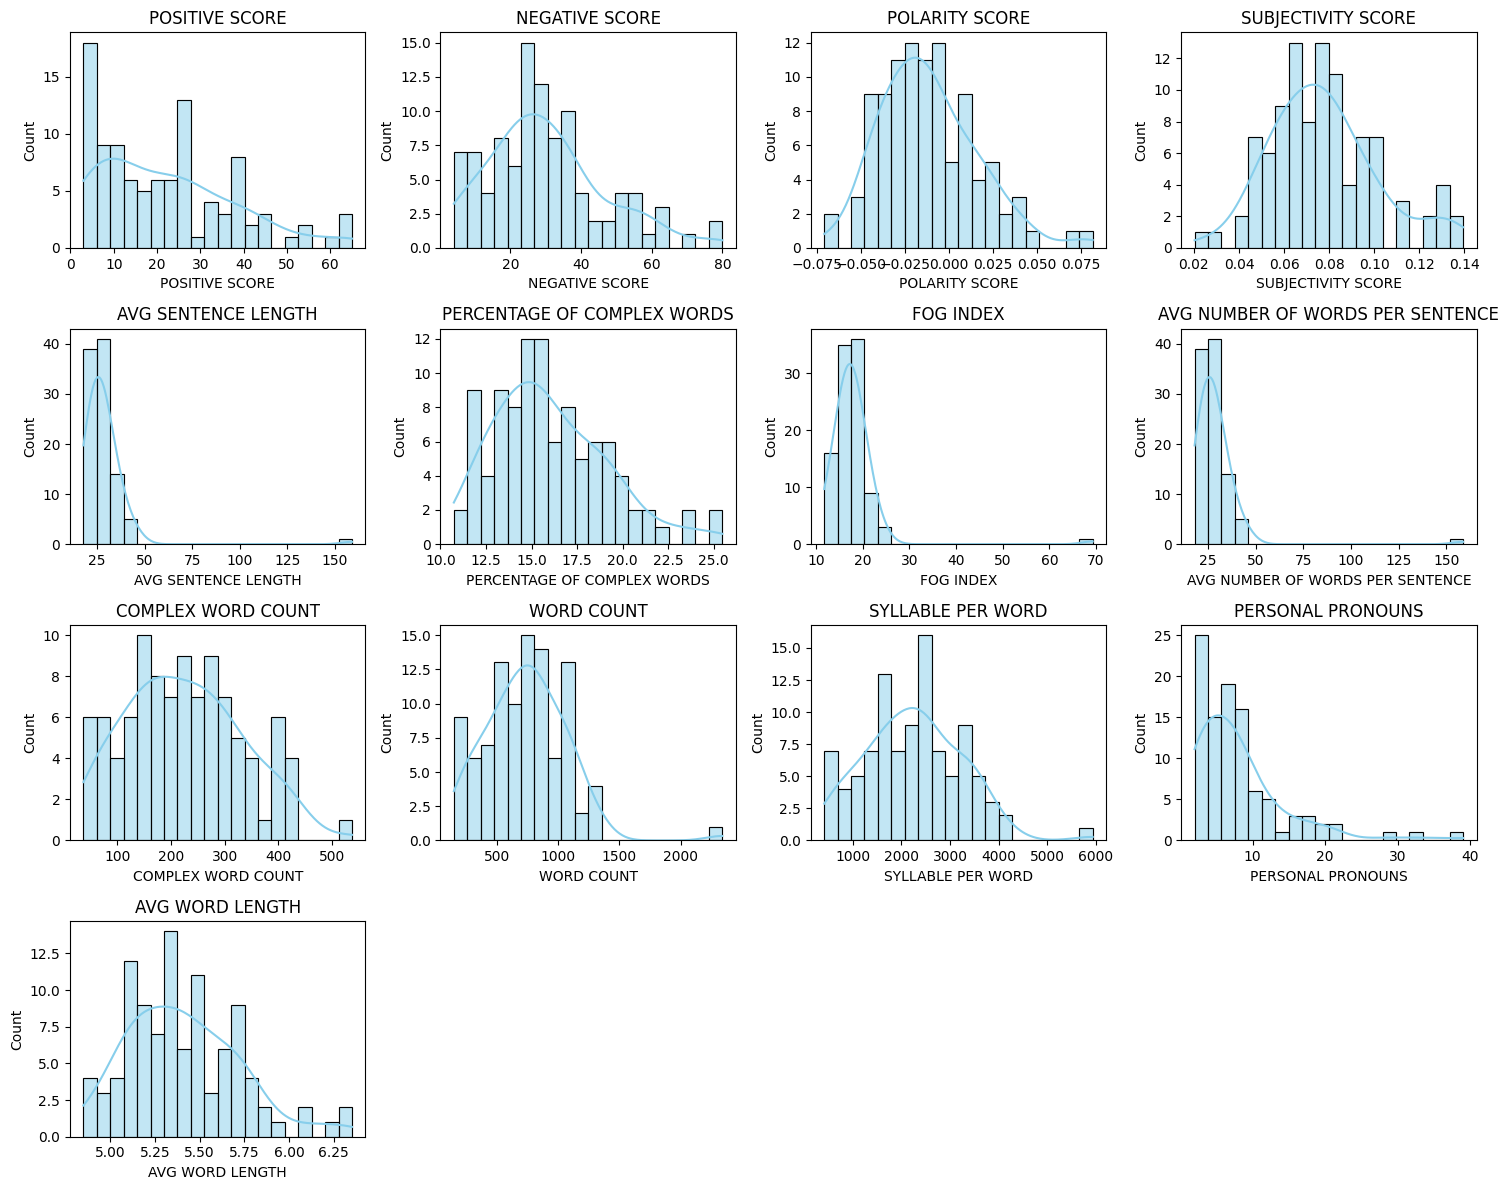

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting columns for the histogram grid
selected_columns = [
    'POSITIVE SCORE', 'NEGATIVE SCORE', 'POLARITY SCORE', 'SUBJECTIVITY SCORE',
    'AVG SENTENCE LENGTH', 'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX',
    'AVG NUMBER OF WORDS PER SENTENCE', 'COMPLEX WORD COUNT', 'WORD COUNT',
    'SYLLABLE PER WORD', 'PERSONAL PRONOUNS', 'AVG WORD LENGTH'
]

# Creating a grid of histograms
plt.figure(figsize=(15, 12))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(outputdf[column], kde=True, color='skyblue', bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()


<ipython-input-30-459c083cd9ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Index'] = data.index


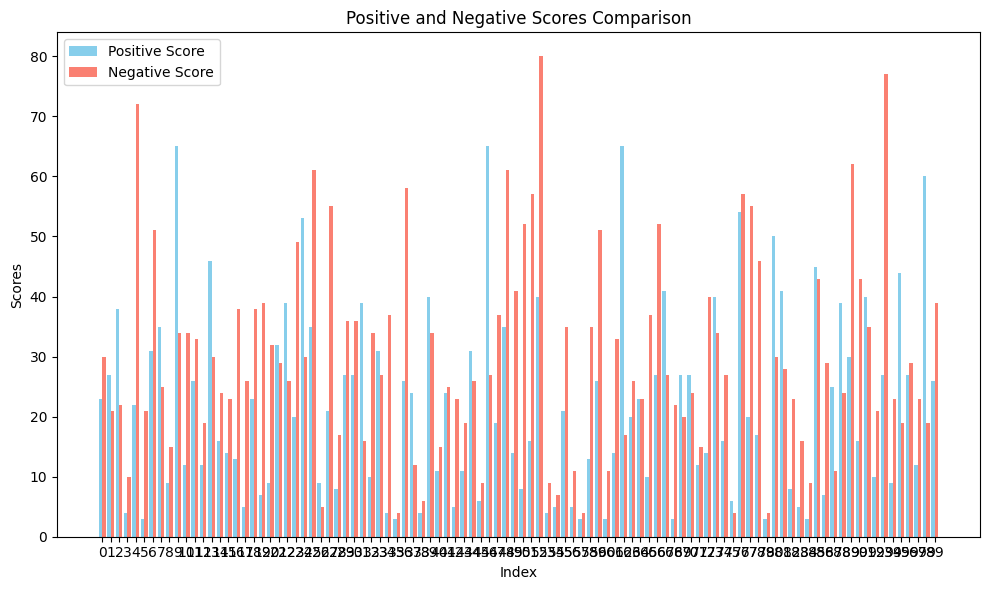

In [30]:
# Selecting data for plotting
data = outputdf[['POSITIVE SCORE', 'NEGATIVE SCORE']]

# Adding an index column to serve as x-axis labels
data['Index'] = data.index

# Creating an attractive bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.4

plt.bar(data['Index'], data['POSITIVE SCORE'], bar_width, label='Positive Score', color='skyblue')
plt.bar(data['Index'] + bar_width, data['NEGATIVE SCORE'], bar_width, label='Negative Score', color='salmon')

plt.xlabel('Index')
plt.ylabel('Scores')
plt.title('Positive and Negative Scores Comparison')
plt.xticks(data['Index'] + bar_width / 2, data['Index'])  # X-axis labels
plt.legend()
plt.tight_layout()

plt.show()
